# Clustering

<b> Overview </b>
- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). 

or

- Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or dissimilarity measure (such as the Euclidean distance).

In this section we will explore a basic clustering task on some synthetic and real datasets.

Here are some common applications of clustering algorithms:

- Primarily used for exploratory data analysis and business applications like customer segmentation, product segmentation, market segmentation.
- Compression, in a data reduction sense
- Can be used as a preprocessing step for recommender systems
- Similarly:
   - grouping related web news (e.g. Google News) and web search results
   - grouping related stock quotes for investment portfolio management
   - building customer profiles for market analysis
- Building a code book of prototype samples for unsupervised feature extraction

----
In this class we will explore a cluster technique called k-means & DBSCAN and understand how they works.

- Introduction to k-means() clustering
- Scaling of data before cluster analysis
- Dendogram to find out optimal number of clusters
- DBSCAN clustering

---
Can a clustering algorithm group them together by how nearer they are to each other?¶

Using K-means clustering technique
- k-mean calculates the distance between the points and the center using euclidean distance and then allocates the points to different clusters.


**Clustering comes with assumptions**: A clustering algorithm finds clusters by making assumptions with samples should be grouped together. Each algorithm makes different assumptions and the quality and interpretability of your results will depend on whether the assumptions are satisfied for your goal. 

> For K-means clustering, the model is that all clusters have equal, spherical variance.

**In general, there is no guarantee that structure found by a clustering algorithm has anything to do with what you were interested in**.

---

# Some Notable Clustering Routines
---

<br>

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

<br>
---
The following are few well-known clustering algorithms. 

- `sklearn.cluster.KMeans`:  <br>
    The simplest, yet effective clustering algorithm. Needs to be provided with the
    number of clusters in advance, and assumes that the data is normalized as input
    (but use a PCA model as preprocessor). <br>  



- `sklearn.cluster.MeanShift`:<br>
    Can find better looking clusters than KMeans but is not scalable to high number of samples.<br>  



- `sklearn.cluster.DBSCAN`: <br>
    Can detect irregularly shaped clusters based on density, i.e. sparse regions in
    the input space are likely to become inter-cluster boundaries. Can also detect
    outliers (samples that are not part of a cluster).<br>  



- `sklearn.cluster.AffinityPropagation`: <br>
    Clustering algorithm based on message passing between data points.<br>  



- `sklearn.cluster.SpectralClustering`: <br>
    KMeans applied to a projection of the normalized graph Laplacian: finds
    normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.<br>  



- `sklearn.cluster.Ward`: <br>
    Ward implements hierarchical clustering based on the Ward algorithm,
    a variance-minimizing approach. At each step, it minimizes the sum of
    squared differences within all clusters (inertia criterion).<br>  
    

Of these, `Ward, SpectralClustering, DBSCAN` and `Affinity Propagation` can also work with precomputed similarity matrices.

## Part 2: Clustering evaluation (Finding optimal number of clusters)

This explains how to find optimal number of clusters in a given dataset by using various techniques.
Different techniques discussed here are
- Dendogram
- Elbow method
- Silhoutte score Analysis
We will first load the data into dataframe and scale the features and create clusters. And then various metrics are calculated to validate the number of cluster creations and what will be the optimal number of clusters.

---
The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

---
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

## Using Dendogram

- Dendogram shows the distance between any two observations in a dataset. The vertical axis determines the distance. The longer the axis, the larger the distance.
- The clustermap feature in seaborn provides the dendogram. It also displays the distance between observations as well as the features. But we are mostly interested in observations.

# Elbow Analysis

- The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion"
- Given a set of observations (x1, x2, …, xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, …, Sk} so as to minimize the within-cluster sum of squares (WCSS) (sum of distance functions of each point in the cluster to the K center).
-In other words, its objective is to find: argminS∑i=1k∑x∈Si∥x−μi∥2

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

C:\Users\USER\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\USER\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\USER\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\USER\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\USER\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\USER\Anac

In [2]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

In [3]:
# reading data into dataframe
telco= pd.read_csv("telco_csv.csv")

In [4]:
telco.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,...,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [5]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(telco)

Number of variables,30
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,234.5 KiB
Average record size in memory,240.1 B
Numeric,12
Categorical,0
Boolean,16
Date,0
Text (Unique),0
Rejected,2


In [ ]:
### Exporting pandas profiling output to html file

output = pandas_profiling.ProfileReport(telco)

output.to_file(outputfile='pandas_profiling.html')

In [6]:
numeric_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'ebill', 'custcat']
[]


In [7]:
telco_num=telco[numeric_var_names]
telco_num.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,...,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [8]:
telco_cat = telco[cat_var_names]
telco_cat.head(5)

""
0
1
2
3
4


In [9]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=telco_num.apply(lambda x: var_summary(x)).T

In [10]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

telco_num=telco_num.apply(lambda x: outlier_capping(x))

In [11]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

telco_num=telco_num.apply(lambda x: Missing_imputation(x))

In [12]:
telco_num.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
region,1.000000,0.016388,0.012903,-0.080637,0.009533,0.023223,-0.057952,0.016618,0.005595,0.050596,...,0.010620,0.017541,-0.017269,0.001482,0.020740,-0.014371,-0.005019,0.009639,0.030039,-0.023771
tenure,0.016388,1.000000,0.490613,0.154171,0.523968,0.290927,-0.109797,0.520351,0.171143,0.023533,...,0.086777,0.085884,0.133585,0.755250,0.239342,-0.064180,0.445672,0.095382,-0.157095,0.166691
age,0.012903,0.490613,1.000000,-0.011957,0.658073,0.388719,-0.154199,0.671798,0.419562,-0.013114,...,0.074877,0.082868,0.122958,0.409538,0.184097,-0.126281,0.288360,0.039280,-0.144105,0.059187
marital,-0.080637,0.154171,-0.011957,1.000000,-0.010709,-0.021195,0.001400,-0.001556,-0.078109,0.008345,...,0.023712,0.043866,0.006040,0.132886,0.063841,0.013961,0.107968,0.051942,-0.056495,0.083836
address,0.009533,0.523968,0.658073,-0.010709,1.000000,0.255677,-0.127278,0.459372,0.282156,0.006453,...,0.058743,0.080751,0.089632,0.471009,0.163823,-0.115242,0.275419,0.014713,-0.130124,0.069913
income,0.023223,0.290927,0.388719,-0.021195,0.255677,1.000000,0.124024,0.609636,-0.103679,0.040286,...,0.144545,0.143558,0.174063,0.244525,0.208104,0.014707,0.169074,0.154315,-0.029922,0.171062
ed,-0.057952,-0.109797,-0.154199,0.001400,-0.127278,0.124024,1.000000,-0.227449,-0.114229,0.006704,...,0.014027,0.029790,0.016628,-0.094830,-0.009181,0.462110,-0.065124,0.320090,0.405040,0.193864
employ,0.016618,0.520351,0.671798,-0.001556,0.459372,0.609636,-0.227449,1.000000,0.273281,0.044054,...,0.151557,0.116052,0.168114,0.464180,0.247376,-0.161682,0.287433,0.037884,-0.181322,0.110760
retire,0.005595,0.171143,0.419562,-0.078109,0.282156,-0.103679,-0.114229,0.273281,1.000000,0.053906,...,0.049210,0.036188,0.060538,0.256609,0.092848,-0.093175,0.111980,-0.026163,-0.082524,0.008908
gender,0.050596,0.023533,-0.013114,0.008345,0.006453,0.040286,0.006704,0.044054,0.053906,1.000000,...,-0.031012,-0.035548,-0.002137,0.005925,0.000980,0.001961,-0.023430,0.011810,-0.015771,-0.004966


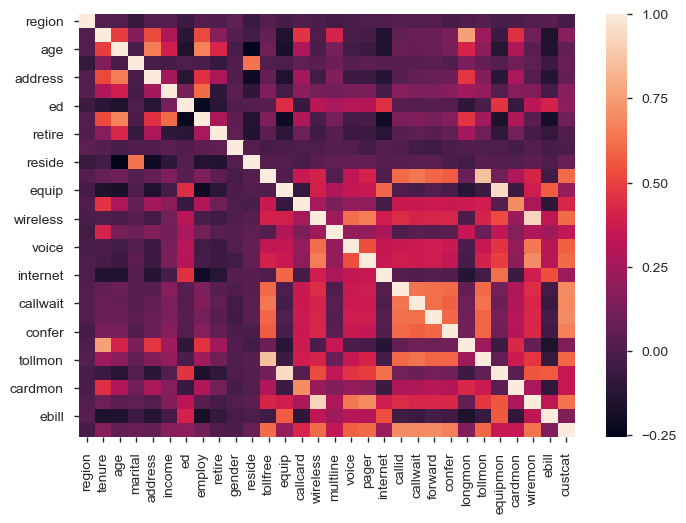

In [13]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(telco_num.corr())

### Standardrizing data 
- To put data on the same scale 

In [14]:
#drop some variables looks numerical nature but they are not numerical (eg: Region, Custcat)

telco_num.drop(['region', 'custcat'], axis=1, inplace=True)

In [15]:
telco_num.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ',
       'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'ebill'],
      dtype='object')

In [16]:
sc=StandardScaler()
#sc.fit()
#sc.transform()

In [17]:
telco_scaled=sc.fit_transform(telco_num)

In [18]:
pd.DataFrame(telco_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.055125,0.189446,1.010051,-0.252674,-0.126231,1.087753,-0.597197,-0.222076,-1.034598,-0.229045,...,-0.962695,-0.970437,1.014099,-1.004008,-0.835868,-0.824695,-0.749071,-0.457615,-0.598794,-0.768001
1,-1.148806,-0.695476,1.010051,-0.453208,0.802534,1.906227,-0.597197,-0.222076,-1.034598,2.607427,...,1.038750,1.030464,1.014099,0.996008,-0.761419,0.484856,-0.749071,0.121006,1.275872,-0.768001
2,1.521092,0.833025,1.010051,1.251336,0.544543,-1.367671,1.811218,-0.222076,0.966559,-0.229045,...,1.038750,1.030464,-0.986097,0.996008,0.700982,0.311301,-0.749071,1.240918,-0.598794,-0.768001
3,-0.118319,-0.695476,-0.990050,0.048128,-0.526115,-0.549196,-1.098950,-0.222076,0.966559,-0.938163,...,-0.962695,-0.970437,-0.986097,-1.004008,-0.224319,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001
4,-0.586722,-0.936819,1.010051,-0.252674,-0.564814,-1.367671,-0.898249,-0.222076,-1.034598,1.189191,...,1.038750,-0.970437,1.014099,0.996008,-0.559342,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001


### Applyting PCA

In [19]:
pc = PCA(n_components=28)

In [20]:
pc.fit(telco_scaled)

PCA(copy=True, iterated_power='auto', n_components=28, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pc.explained_variance_

array([6.66244068, 4.91326268, 2.87933837, 1.80304708, 1.2109082 ,
       1.08062741, 0.99708147, 0.86501531, 0.79050289, 0.68337533,
       0.6109398 , 0.58922782, 0.54240372, 0.48141267, 0.45938891,
       0.43754823, 0.42668323, 0.38936756, 0.36180249, 0.35410928,
       0.33468637, 0.30274398, 0.24838842, 0.20014787, 0.19315674,
       0.11451467, 0.0687937 , 0.02711315])

In [ ]:
#Eigen values
sum(pc.explained_variance_)

In [22]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

In [23]:
var

array([0.23770637, 0.17529819, 0.10273068, 0.06433014, 0.04320347,
       0.03855524, 0.03557444, 0.03086251, 0.02820401, 0.02438186,
       0.02179746, 0.02102281, 0.01935219, 0.01717612, 0.01639034,
       0.0156111 , 0.01522345, 0.01389208, 0.0129086 , 0.01263411,
       0.01194113, 0.01080147, 0.00886214, 0.00714099, 0.00689156,
       0.00408572, 0.00245446, 0.00096736])

In [24]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [25]:
var1

array([ 23.77,  41.3 ,  51.57,  58.  ,  62.32,  66.18,  69.74,  72.83,
        75.65,  78.09,  80.27,  82.37,  84.31,  86.03,  87.67,  89.23,
        90.75,  92.14,  93.43,  94.69,  95.88,  96.96,  97.85,  98.56,
        99.25,  99.66,  99.91, 100.01])

number of components have choosen as 9 based on cumulative variacne is explaining >75 % and individual component explaining >0.8 variance


In [26]:
pc_final=PCA(n_components=9).fit(telco_scaled)

In [27]:
pc_final.explained_variance_

array([6.66244068, 4.91326268, 2.87933835, 1.80304567, 1.21084709,
       1.08050004, 0.99694818, 0.86451176, 0.79026509])

In [30]:
reduced_cr=pc_final.transform(telco_scaled)  # the out put is Factors (F1, F2, ...F9)

In [33]:
dimensions = pd.DataFrame(reduced_cr)

In [34]:
dimensions

,0,1,2,3,4,5,6,7,8
0,-2.304546,0.054426,-0.795751,0.372997,0.180848,-0.690906,0.897660,0.887875,0.158888
1,2.878861,-0.970336,-2.912226,1.741198,1.375016,-0.038188,1.047020,1.080804,-1.333588
2,0.627667,3.970792,-0.274135,0.554847,0.660765,0.180270,-0.739890,0.458249,1.103178
3,-3.614708,-0.087762,-0.486468,-1.037676,-0.153962,0.127811,-1.051171,-0.234698,-1.122794
4,-2.120436,0.041301,-2.498328,1.168065,0.250664,0.496650,1.345875,0.083594,-0.205347
5,-0.633535,1.996774,-1.135497,-1.126317,0.056085,-0.344701,-1.219254,-0.288740,0.486737
6,-1.800856,-1.056708,0.186924,2.747061,-0.475913,0.100980,-1.141517,-0.468195,0.157923
7,5.079148,-2.389302,-0.251075,-0.353242,-0.690141,-0.593506,0.653198,0.186627,-0.434647
8,1.423667,2.467283,-0.845350,1.477749,2.077103,0.100152,1.380356,-1.164850,0.975383
9,-1.952687,2.538576,1.841140,1.945432,-0.259178,-0.936555,0.702156,0.083614,-0.862181


In [35]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8","C9"]

In [36]:
dimensions.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,-2.304546,0.054426,-0.795751,0.372997,0.180848,-0.690906,0.897660,0.887875,0.158888
1,2.878861,-0.970336,-2.912226,1.741198,1.375016,-0.038188,1.047020,1.080804,-1.333588
2,0.627667,3.970792,-0.274135,0.554847,0.660765,0.180270,-0.739890,0.458249,1.103178
3,-3.614708,-0.087762,-0.486468,-1.037676,-0.153962,0.127811,-1.051171,-0.234698,-1.122794
4,-2.120436,0.041301,-2.498328,1.168065,0.250664,0.496650,1.345875,0.083594,-0.205347


#### Factor Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [37]:
#pc_final.components_

#print pd.DataFrame(pc_final.components_,columns=telco_num.columns).T

Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=telco_num.columns).T

In [38]:
Loadings.to_csv("Loadings.csv")

### Clustering 

In [39]:
#selected the list variables from PCA based on factor loading matrics
list_var = ['wiremon','tollmon','callcard','employ','tenure','multline','income','retire','gender','marital']

In [40]:
telco_scaled1=pd.DataFrame(telco_scaled, columns=telco_num.columns)
telco_scaled1.head(5)

telco_scaled2=telco_scaled1[list_var]
telco_scaled2.head(5)

,wiremon,tollmon,callcard,employ,tenure,multline,income,retire,gender,marital
0,-0.598794,-0.824695,0.689149,-0.597197,-1.055125,-0.95119,-0.126231,-0.222076,-1.034598,1.010051
1,1.275872,0.484856,0.689149,-0.597197,-1.148806,-0.95119,0.802534,-0.222076,-1.034598,1.010051
2,-0.598794,0.311301,0.689149,1.811218,1.521092,-0.95119,0.544543,-0.222076,0.966559,1.010051
3,-0.598794,-0.824695,-1.451065,-1.098950,-0.118319,-0.95119,-0.526115,-0.222076,0.966559,-0.990050
4,-0.598794,-0.824695,-1.451065,-0.898249,-0.586722,-0.95119,-0.564814,-0.222076,-1.034598,1.010051


## Segmentation

In [ ]:
KMeans?

In [41]:
km_3=KMeans(n_clusters=3,random_state=123)

In [42]:
km_3.fit(telco_scaled2)
#km_4.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [43]:
km_3.labels_

array([1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1,
       2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0,

In [44]:
km_3.cluster_centers_

array([[-0.11780991,  0.41809243,  0.41593012,  1.23057267,  0.77065079,
         0.11397234, -0.46685987,  4.50295411,  0.24273609, -0.35171971],
       [-0.31136843, -0.37454471, -0.55315924, -0.52452894, -0.65303407,
        -0.41028329, -0.38147772, -0.22207644, -0.0263524 , -0.03981042],
       [ 0.38995682,  0.40803247,  0.62459491,  0.50108397,  0.70687517,
         0.48448069,  0.51293221, -0.22207644,  0.0054463 ,  0.08657045]])

In [45]:
km_4=KMeans(n_clusters=4,random_state=123).fit(telco_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(telco_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(telco_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(telco_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(telco_scaled2)
#km_5.labels_

In [46]:
metrics.silhouette_score(telco_scaled2, km_8.labels_)

0.19991014905742555

In [47]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
telco_num['cluster_3'] = km_3.labels_
telco_num['cluster_4'] = km_4.labels_
telco_num['cluster_5'] = km_5.labels_
telco_num['cluster_6'] = km_6.labels_
telco_num['cluster_7'] = km_7.labels_
telco_num['cluster_8'] = km_8.labels_

In [48]:
telco_num.head(5)

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,13.0,44.0,1.0,9.0,64.0,4.0,5.0,0.0,0.0,2.0,...,0.0,7.50,0.0,0.0,1,2,3,0,0,7
1,11.0,33.0,1.0,7.0,136.0,5.0,5.0,0.0,0.0,6.0,...,0.0,15.25,35.7,0.0,1,2,3,0,0,7
2,68.0,52.0,1.0,24.0,116.0,1.0,29.0,0.0,1.0,2.0,...,0.0,30.25,0.0,0.0,2,3,4,5,6,2
3,33.0,33.0,0.0,12.0,33.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.00,0.0,0.0,1,1,0,1,2,6
4,23.0,30.0,1.0,9.0,30.0,1.0,2.0,0.0,0.0,4.0,...,0.0,0.00,0.0,0.0,1,1,0,1,5,1


### Choosing number clusters using Silhouette Coefficient

In [49]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(telco_scaled2, km_5.labels_)

0.18999631536884978

In [50]:
# calculate SC for K=3 through K=12
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(telco_scaled2)
    scores.append(metrics.silhouette_score(telco_scaled2, km.labels_))

In [51]:
scores

[0.19544205668977482,
 0.17431852549299548,
 0.18999631536884978,
 0.20013411003806397,
 0.19267918888581145,
 0.19991014905742555]

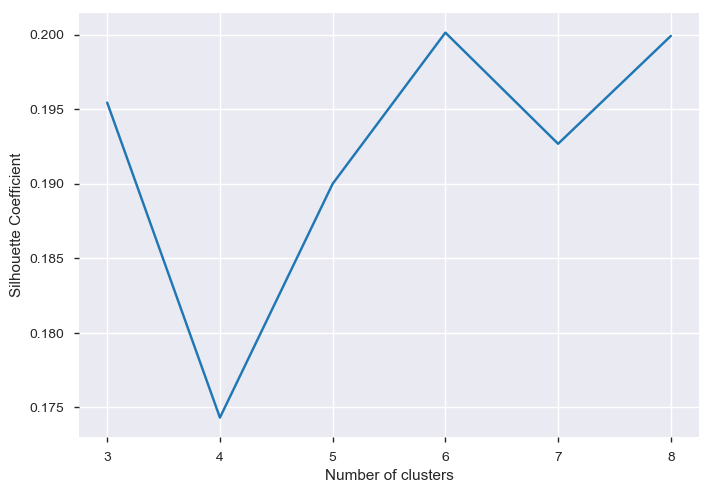

In [52]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### Note

The solution can be 6, 8 based on the SC score. If we take highest SC score, 6 segment solution is best

### Segment Distribution

In [53]:
telco_num.cluster_6.value_counts()/sum(telco_num.cluster_6.value_counts())

1    0.299
0    0.249
5    0.191
3    0.143
2    0.071
4    0.047
Name: cluster_6, dtype: float64

# Profiling

In [73]:
telco_num.cluster_3.value_counts()*100/sum(telco_num.cluster_3.value_counts())

1    52.2
2    43.1
0     4.7
Name: cluster_3, dtype: float64

In [74]:
pd.Series.sort_index(telco_num.cluster_5.value_counts())

0    302
1     47
2    280
3    266
4    105
Name: cluster_5, dtype: int64

In [75]:
size=pd.concat([pd.Series(telco_num.cluster_3.size), pd.Series.sort_index(telco_num.cluster_3.value_counts()), pd.Series.sort_index(telco_num.cluster_4.value_counts()),
           pd.Series.sort_index(telco_num.cluster_5.value_counts()), pd.Series.sort_index(telco_num.cluster_6.value_counts()),
           pd.Series.sort_index(telco_num.cluster_7.value_counts()), pd.Series.sort_index(telco_num.cluster_8.value_counts())])

In [76]:
size

0    1000
0      47
1     522
2     431
0      47
1     309
2     443
3     201
0     302
1      47
2     280
3     266
4     105
0     249
1     299
2      71
3     143
4      47
5     191
0     242
1     186
2     157
3      47
4     141
5     148
6      79
0     128
1     147
2     178
3      47
4      57
5     136
6     157
7     150
dtype: int64

In [77]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/telco_num.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,1000,47,522,431,47,309,443,201,302,47,...,148,79,128,147,178,47,57,136,157,150


In [78]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.047,0.522,0.431,0.047,0.309,0.443,0.201,0.302,0.047,...,0.148,0.079,0.128,0.147,0.178,0.047,0.057,0.136,0.157,0.15


In [79]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,1000.0,47.000,522.000,431.000,47.000,309.000,443.000,201.000,302.000,47.000,...,148.000,79.000,128.000,147.000,178.000,47.000,57.000,136.000,157.000,150.00
Seg_Pct,1.0,0.047,0.522,0.431,0.047,0.309,0.443,0.201,0.302,0.047,...,0.148,0.079,0.128,0.147,0.178,0.047,0.057,0.136,0.157,0.15


In [ ]:
telco_num.head()

In [63]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([telco_num.apply(lambda x: x.mean()).T, telco_num.groupby('cluster_3').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_5').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_7').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [64]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
tenure,35.526000,51.978723,21.584291,50.617169,51.978723,20.728155,35.934537,53.527363,20.271523,51.978723,...,21.614865,50.518987,28.054688,21.673469,56.146067,51.978723,51.245614,44.022059,19.617834,28.826667
age,41.645100,65.129574,35.591954,46.415336,65.129574,35.702265,39.327336,50.398010,35.301325,65.129574,...,35.979730,54.379747,37.070391,36.088435,44.539326,65.129574,56.070175,43.110294,34.961783,40.386667
marital,0.495000,0.319149,0.475096,0.538283,0.319149,0.459547,0.516930,0.542289,0.453642,0.319149,...,0.412162,0.379747,0.468750,0.414966,0.640449,0.319149,0.385965,0.566176,0.490446,0.460000
address,11.520000,24.191489,7.637931,14.839907,24.191489,7.417476,10.724605,16.616915,7.284768,24.191489,...,7.641892,18.658228,9.445312,7.687075,15.039326,24.191489,18.000000,12.264706,7.108280,10.380000
income,73.785700,37.593617,44.212644,113.549420,37.593617,49.647249,51.370203,168.760199,45.705298,37.593617,...,46.216216,272.402532,53.710938,46.414966,71.455056,37.593617,317.557895,88.992647,46.942675,53.520000
ed,2.671000,2.042553,2.643678,2.772622,2.042553,2.786408,2.636569,2.716418,2.764901,2.042553,...,2.810811,2.518987,2.429688,2.809524,2.685393,2.042553,2.578947,3.250000,2.745223,2.353333
employ,10.951100,23.213830,5.724138,15.944432,23.213830,6.216828,7.945824,21.985323,5.867550,23.213830,...,6.074324,28.785443,7.796875,6.115646,12.870787,23.213830,30.737719,12.205882,5.866242,8.926667
retire,0.047000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
gender,0.517000,0.638298,0.503831,0.519722,0.638298,0.517799,0.507901,0.507463,0.519868,0.638298,...,0.000000,0.632911,1.000000,0.000000,0.528090,0.638298,0.666667,0.514706,1.000000,0.000000
reside,2.323000,1.425532,2.417625,2.306265,1.425532,2.372168,2.413093,2.258706,2.374172,1.425532,...,2.270270,1.873418,2.359375,2.251701,2.483146,1.425532,1.859649,2.529412,2.484076,2.273333


In [80]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [81]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,1000.000000,47.000000,522.000000,431.000000,47.000000,309.000000,443.000000,201.000000,302.000000,47.000000,...,148.000000,79.000000,128.000000,147.000000,178.000000,47.000000,57.000000,136.000000,157.000000,150.000000
Seg_Pct,1.000000,0.047000,0.522000,0.431000,0.047000,0.309000,0.443000,0.201000,0.302000,0.047000,...,0.148000,0.079000,0.128000,0.147000,0.178000,0.047000,0.057000,0.136000,0.157000,0.150000
tenure,35.526000,51.978723,21.584291,50.617169,51.978723,20.728155,35.934537,53.527363,20.271523,51.978723,...,21.614865,50.518987,28.054688,21.673469,56.146067,51.978723,51.245614,44.022059,19.617834,28.826667
age,41.645100,65.129574,35.591954,46.415336,65.129574,35.702265,39.327336,50.398010,35.301325,65.129574,...,35.979730,54.379747,37.070391,36.088435,44.539326,65.129574,56.070175,43.110294,34.961783,40.386667
marital,0.495000,0.319149,0.475096,0.538283,0.319149,0.459547,0.516930,0.542289,0.453642,0.319149,...,0.412162,0.379747,0.468750,0.414966,0.640449,0.319149,0.385965,0.566176,0.490446,0.460000
address,11.520000,24.191489,7.637931,14.839907,24.191489,7.417476,10.724605,16.616915,7.284768,24.191489,...,7.641892,18.658228,9.445312,7.687075,15.039326,24.191489,18.000000,12.264706,7.108280,10.380000
income,73.785700,37.593617,44.212644,113.549420,37.593617,49.647249,51.370203,168.760199,45.705298,37.593617,...,46.216216,272.402532,53.710938,46.414966,71.455056,37.593617,317.557895,88.992647,46.942675,53.520000
ed,2.671000,2.042553,2.643678,2.772622,2.042553,2.786408,2.636569,2.716418,2.764901,2.042553,...,2.810811,2.518987,2.429688,2.809524,2.685393,2.042553,2.578947,3.250000,2.745223,2.353333
employ,10.951100,23.213830,5.724138,15.944432,23.213830,6.216828,7.945824,21.985323,5.867550,23.213830,...,6.074324,28.785443,7.796875,6.115646,12.870787,23.213830,30.737719,12.205882,5.866242,8.926667
retire,0.047000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [82]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [83]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,1000.000000,47.000000,522.000000,431.000000,47.000000,309.000000,443.000000,201.000000,302.000000,47.000000,...,148.000000,79.000000,128.000000,147.000000,178.000000,47.000000,57.000000,136.000000,157.000000,150.000000
Seg_Pct,1.000000,0.047000,0.522000,0.431000,0.047000,0.309000,0.443000,0.201000,0.302000,0.047000,...,0.148000,0.079000,0.128000,0.147000,0.178000,0.047000,0.057000,0.136000,0.157000,0.150000
tenure,35.526000,51.978723,21.584291,50.617169,51.978723,20.728155,35.934537,53.527363,20.271523,51.978723,...,21.614865,50.518987,28.054688,21.673469,56.146067,51.978723,51.245614,44.022059,19.617834,28.826667
age,41.645100,65.129574,35.591954,46.415336,65.129574,35.702265,39.327336,50.398010,35.301325,65.129574,...,35.979730,54.379747,37.070391,36.088435,44.539326,65.129574,56.070175,43.110294,34.961783,40.386667
marital,0.495000,0.319149,0.475096,0.538283,0.319149,0.459547,0.516930,0.542289,0.453642,0.319149,...,0.412162,0.379747,0.468750,0.414966,0.640449,0.319149,0.385965,0.566176,0.490446,0.460000
address,11.520000,24.191489,7.637931,14.839907,24.191489,7.417476,10.724605,16.616915,7.284768,24.191489,...,7.641892,18.658228,9.445312,7.687075,15.039326,24.191489,18.000000,12.264706,7.108280,10.380000
income,73.785700,37.593617,44.212644,113.549420,37.593617,49.647249,51.370203,168.760199,45.705298,37.593617,...,46.216216,272.402532,53.710938,46.414966,71.455056,37.593617,317.557895,88.992647,46.942675,53.520000
ed,2.671000,2.042553,2.643678,2.772622,2.042553,2.786408,2.636569,2.716418,2.764901,2.042553,...,2.810811,2.518987,2.429688,2.809524,2.685393,2.042553,2.578947,3.250000,2.745223,2.353333
employ,10.951100,23.213830,5.724138,15.944432,23.213830,6.216828,7.945824,21.985323,5.867550,23.213830,...,6.074324,28.785443,7.796875,6.115646,12.870787,23.213830,30.737719,12.205882,5.866242,8.926667
retire,0.047000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [84]:
Profling_output_final.to_csv('Profiling_output.csv')

In [87]:
telco_num[telco_num.cluster_6==2].head()

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
8,45.0,59.0,1.0,7.0,166.0,4.0,31.00,0.0,0.0,5.0,...,0.00,12.00,0.0,0.0,2,3,4,2,6,2
16,60.0,57.0,0.0,38.0,162.0,2.0,30.00,0.0,0.0,1.0,...,31.30,30.00,0.0,0.0,2,3,4,2,6,4
63,69.0,51.0,1.0,11.0,438.0,4.0,23.00,0.0,1.0,2.0,...,47.05,24.75,0.0,0.0,2,3,4,2,6,4
78,67.0,68.0,0.0,28.0,244.0,1.0,40.01,0.0,1.0,1.0,...,0.00,30.75,0.0,0.0,2,3,4,2,6,4
83,31.0,53.0,0.0,2.0,351.0,3.0,31.00,0.0,1.0,1.0,...,0.00,19.25,0.0,0.0,2,3,4,2,6,4


### Assigning segments to new data (Predicting segment for new data)

In [88]:
new_cust = pd.read_csv('Telco_new_cust.csv')

In [89]:
new_cust1 = new_cust.drop(['region', 'custcat'], axis=1)

In [90]:
new_cust_scaled=sc.transform(new_cust1)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [91]:
list_var = ['wiremon','tollmon','callcard','employ','tenure','multline','income','retire','gender','marital']

In [92]:
new_cust_scaled = pd.DataFrame(new_cust_scaled, columns=new_cust1.columns)

In [93]:
new_cust_scaled = new_cust_scaled[list_var]

In [94]:
new_cust_scaled.head()

,wiremon,tollmon,callcard,employ,tenure,multline,income,retire,gender,marital
0,-0.598794,1.179075,0.689149,1.309465,0.115883,1.051315,0.789634,-0.222076,-1.034598,1.010051
1,0.931920,-0.824695,0.689149,-0.998599,1.099530,1.051315,-0.422919,-0.222076,0.966559,1.010051
2,-0.598794,-0.824695,-1.451065,2.212621,0.865328,-0.951190,6.620209,-0.222076,-1.034598,-0.990050
3,2.528274,0.500633,0.689149,-0.396495,-1.242486,-0.951190,-0.461618,-0.222076,0.966559,-0.990050
4,-0.598794,-0.824695,0.689149,-0.095443,1.474252,1.051315,-0.319723,-0.222076,0.966559,1.010051


In [ ]:
import numpy as np

In [95]:
def kmeans_assignment(centroids, points):
    num_centroids, dim = centroids.shape
    num_points, _ = points.shape

  # Tile and reshape both arrays into `[num_points, num_centroids, dim]`.
    centroids = np.tile(centroids, [num_points, 1]).reshape([num_points, num_centroids, dim])
    points = np.tile(points, [1, num_centroids]).reshape([num_points, num_centroids, dim])

  # Compute all distances (for all points and all centroids) at once and 
  # select the min centroid for each point.
    distances = np.sum(np.square(centroids - points), axis=2)
    return np.argmin(distances, axis=1)

In [96]:
centroids = km_6.cluster_centers_

In [97]:
points = new_cust_scaled

In [98]:
kmeans_assignment(centroids, points)

array([5, 5, 2, 3, 5, 1, 1, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 1, 0, 4, 3, 3,
       1, 1, 3, 2, 5, 2, 2, 3, 1, 1, 5, 5, 2, 0, 3, 0, 0, 0, 2, 3, 0, 3,
       3, 0, 0, 4, 0, 0, 1, 5, 3, 0, 5, 3, 0, 2, 3, 1, 1, 0, 0, 3, 3, 2,
       1, 0, 2, 2, 1, 0, 5, 1, 3, 3, 3, 0, 1, 0, 1, 1, 0, 3, 4, 5, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 3, 0, 0, 5, 1], dtype=int64)

In [99]:
new_cust['pred_segment'] = pd.Series(kmeans_assignment(centroids, points))

In [100]:
new_cust.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat,pred_segment
0,1,38,55,1,12,135,2,24,0,0,...,1,1,12.15,31.75,0.00,16.25,0.00,1,4,5
1,3,59,26,1,3,41,4,1,0,1,...,0,0,12.65,0.00,35.10,46.75,29.15,0,2,5
2,2,54,55,0,1,587,3,33,0,0,...,1,1,13.00,0.00,0.00,0.00,0.00,0,3,2
3,3,9,40,0,13,38,4,7,0,1,...,1,1,3.35,21.00,42.40,17.50,59.55,1,4,3
4,1,67,67,1,38,49,2,10,0,1,...,0,0,14.30,0.00,29.25,25.25,0.00,1,2,5


### Finding Optimal number of clusters (optional)

### Elbow Analysis 

In [ ]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( telco_scaled2 )
    cluster_errors.append( clusters.inertia_ )

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

#  DBSCAN clustering
### Density-based spatial clustering of applications with noise (DBSCAN) 

In [ ]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2.05, min_samples=10)
db.fit(telco_scaled2)

In [ ]:
pd.Series(db.labels_).value_counts()

In [ ]:
# review the cluster labels
db.labels_

In [ ]:
# save the cluster labels and sort by cluster
telco_num['DB_cluster'] = db.labels_

In [ ]:
# review the cluster centers
telco_num.groupby('DB_cluster').mean()